In [22]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [23]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [24]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [25]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [26]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [27]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [28]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection'] 

In [29]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [30]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [31]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"   

In [32]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass


'Sun Nov 07 18:42:32 +0000 2021'
'Sun Nov 07 18:42:31 +0000 2021'
'Sun Nov 07 18:42:31 +0000 2021'
'Sun Nov 07 18:42:31 +0000 2021'
'Sun Nov 07 18:42:30 +0000 2021'
'Sun Nov 07 18:42:30 +0000 2021'
'Sun Nov 07 18:42:30 +0000 2021'
'Sun Nov 07 18:42:30 +0000 2021'
'Sun Nov 07 18:42:29 +0000 2021'
'Sun Nov 07 18:42:29 +0000 2021'
'Sun Nov 07 18:42:28 +0000 2021'
'Sun Nov 07 18:42:28 +0000 2021'
'Sun Nov 07 18:42:27 +0000 2021'
'Sun Nov 07 18:42:27 +0000 2021'
'Sun Nov 07 18:42:26 +0000 2021'
'Sun Nov 07 18:42:26 +0000 2021'
'Sun Nov 07 18:42:25 +0000 2021'
'Sun Nov 07 18:42:25 +0000 2021'
'Sun Nov 07 18:42:24 +0000 2021'
'Sun Nov 07 18:42:23 +0000 2021'
'Sun Nov 07 18:42:23 +0000 2021'
'Sun Nov 07 18:42:23 +0000 2021'
'Sun Nov 07 18:42:22 +0000 2021'
'Sun Nov 07 18:42:21 +0000 2021'
'Sun Nov 07 18:42:21 +0000 2021'
'Sun Nov 07 18:42:19 +0000 2021'
'Sun Nov 07 18:42:19 +0000 2021'
'Sun Nov 07 18:42:19 +0000 2021'
'Sun Nov 07 18:42:18 +0000 2021'
'Sun Nov 07 18:42:18 +0000 2021'
'Sun Nov 0

In [33]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                      max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sun Nov 07 18:41:39 +0000 2021'
'Sun Nov 07 18:41:36 +0000 2021'
'Sun Nov 07 18:41:36 +0000 2021'
'Sun Nov 07 18:41:35 +0000 2021'
'Sun Nov 07 18:41:34 +0000 2021'
'Sun Nov 07 18:41:34 +0000 2021'
'Sun Nov 07 18:41:34 +0000 2021'
'Sun Nov 07 18:41:31 +0000 2021'
'Sun Nov 07 18:41:31 +0000 2021'
'Sun Nov 07 18:41:30 +0000 2021'
'Sun Nov 07 18:41:30 +0000 2021'
'Sun Nov 07 18:41:28 +0000 2021'
'Sun Nov 07 18:41:26 +0000 2021'
'Sun Nov 07 18:41:26 +0000 2021'
'Sun Nov 07 18:41:26 +0000 2021'
'Sun Nov 07 18:41:25 +0000 2021'
'Sun Nov 07 18:41:25 +0000 2021'
'Sun Nov 07 18:41:24 +0000 2021'
'Sun Nov 07 18:41:24 +0000 2021'
'Sun Nov 07 18:41:24 +0000 2021'
'Sun Nov 07 18:41:24 +0000 2021'
'Sun Nov 07 18:41:24 +0000 2021'
'Sun Nov 07 18:41:23 +0000 2021'
'Sun Nov 07 18:41:22 +0000 2021'
'Sun Nov 07 18:41:22 +0000 2021'
'Sun Nov 07 18:41:21 +0000 2021'
'Sun Nov 07 18:41:21 +0000 2021'
'Sun Nov 07 18:41:20 +0000 2021'
'Sun Nov 07 18:41:20 +0000 2021'
'Sun Nov 07 18:41:19 +0000 2021'
'Sun Nov 0

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&max_id=1457416574277615616&oauth_consumer_key=uHvizo6EmsBOVBzm5Rda1PlrT&oauth_nonce=7537706454262686949&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1636310584&oauth_token=60388598-MNOLnSnLK8ZJwWh2isDw0ojr0NXqc57nmNJ4ML4Z4&oauth_version=1.0&q=covid19&oauth_signature=4xXeNTdvEh%2BfINuq1WSLyMU%2Fa8I%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

In [34]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

31665
25158


In [35]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [37]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

In [38]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Barbara Irvine
text: RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #vaccinated  
69% of COVID19 cases #vaccinated
76% of COVID19 hospitalisations
94% of COVID19 d…
----
name: ian mchaffie
text: RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #vaccinated  
69% of COVID19 cases #vaccinated
76% of COVID19 hospitalisations
94% of COVID19 d…
----
name: KD1
text: RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #vaccinated  
69% of COVID19 cases #vaccinated
76% of COVID19 hospitalisations
94% of COVID19 d…
----
name: RobSma
text: RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #vaccinated  
69% of COVID19 cases #vaccinated
76% of COVID19 hospitalisations
94% of COVID19 d…
----
name: Beagle
text: RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #vaccinated  
69% of COVID19 cases #vaccinated
76% of COVID19 hospitalisations
94% of COVID19 d…
----
name: Beaux Reliosis
text: RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #vaccinated  
69% of COVID19 cases #vaccinated
76% of COVID19 hospitalisations
94% of CO

In [39]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) 

In [40]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities,withheld_in_countries
0,61881e0a795cb9c0fcb37da4,Sun Nov 07 15:56:10 +0000 2021,1457376338453667843,1457376338453667843,RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #v...,False,"{'hashtags': [{'text': 'vaccinated', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,61881df8795cb9c0fcb37a17,Sun Nov 07 16:04:20 +0000 2021,1457378393608105987,1457378393608105987,RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #v...,False,"{'hashtags': [{'text': 'vaccinated', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,61881dca795cb9c0fcb370eb,Sun Nov 07 16:26:18 +0000 2021,1457383923529490443,1457383923529490443,RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #v...,False,"{'hashtags': [{'text': 'vaccinated', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3,61881d7a795cb9c0fcb360fb,Sun Nov 07 17:08:17 +0000 2021,1457394486091427840,1457394486091427840,RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #v...,False,"{'hashtags': [{'text': 'vaccinated', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
4,61881d5f795cb9c0fcb35bc0,Sun Nov 07 17:22:39 +0000 2021,1457398103045193735,1457398103045193735,RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #v...,False,"{'hashtags': [{'text': 'vaccinated', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
5,61881d54795cb9c0fcb359a6,Sun Nov 07 17:28:39 +0000 2021,1457399613711917058,1457399613711917058,RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #v...,False,"{'hashtags': [{'text': 'vaccinated', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
6,61881d0a795cb9c0fcb34ac8,Sun Nov 07 18:09:35 +0000 2021,1457409913219690499,1457409913219690499,RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #v...,False,"{'hashtags': [{'text': 'vaccinated', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
7,61881cf6795cb9c0fcb346db,Sun Nov 07 18:21:41 +0000 2021,1457412960322834433,1457412960322834433,RT @FreedomPodcast1: 75% of 🏴󠁧󠁢󠁳󠁣󠁴󠁿Scotland #v...,False,"{'hashtags': [{'text': 'vaccinated', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
8,6182f4829b3663b62b3dcb45,Wed Nov 03 19:28:47 +0000 2021,1455980291923791882,1455980291923791882,RT @LongCovidKids: Kids do get #COVID19 \nKids...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
9,6182f11b9b3663b62b3dc62a,Wed Nov 03 19:39:06 +0000 2021,1455982889754144768,1455982889754144768,RT @LongCovidKids: Kids do get #COVID19 \nKids...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

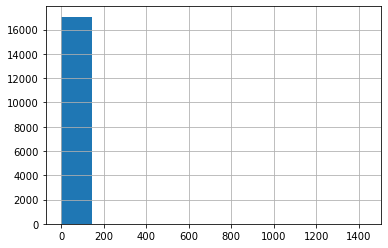

In [41]:
tweet_df["favorite_count"].hist()